In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train_set.csv")
df.head(5)


,xval,yval,color
0,16.263398,13.299206,r
1,0.775408,23.986692,r
2,29.170503,-3.287474,r
3,6.739044,-28.033329,r
4,3.216100,22.013695,r


In [35]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = df.drop(['color'], axis='columns')
y = df['color']

names = ['r', 'g', 'b']
feature_names = ['xval','yval']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [37]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 548 entries, 506 to 619
Data columns (total 2 columns):
xval    548 non-null float64
yval    548 non-null float64
dtypes: float64(2)
memory usage: 12.8 KB
None


In [38]:
X_scaled


array([[ 0.82771544,  0.65084789],
       [ 0.00946273,  1.22006646],
       [ 1.50961626, -0.23256342],
       ...,
       [-1.16914843, -0.45142361],
       [ 0.26961011,  1.57986693],
       [ 0.58832844,  0.97722255]])

In [39]:
X_train

,xval,yval
506,10.657675,-20.531530
276,-1.597079,0.535253
360,19.970632,19.682615
572,18.737722,12.619109
46,13.868142,26.198832
565,1.033967,-21.197991
57,-40.559928,-26.151478
105,-9.721669,-25.974789
451,9.913082,32.260374
210,0.479928,-21.416955


In [57]:
import itertools


def Eval (model):

    predictions = model.predict(X_test)




    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting normalize=True.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("\nNormalized confusion matrix")
        else:
            print('\nConfusion matrix, without normalization')

        #print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')



    
    print ("\nTrain Accuracy : ", accuracy_score(y_train, model.predict(X_train)))
    print ("\nTest Accuracy  : ", accuracy_score(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    #print (" Confusion matrix ", confmat)

        #plots confusion matrix non-normalized
    #cm = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm, ['R','G','B'])
    plt.show()

    #plots confusion matrix normalized
    plot_confusion_matrix(cm, ['R','G','B'], normalize=True)
    plt.show()

    
    from sklearn.metrics import classification_report
    
    print("\nCLASSIFICATION REPORT WITH PERCISION AND REACALL\n")
    target_names = ['R','G', 'B']
    print(classification_report(y_test, predictions, target_names=target_names))
    
    

In [50]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100), random_state=1, max_iter= 1000)

neuralnetwork= clf.fit(X_train, y_train)                         



Train Accuracy :  0.9835766423357665

Test Accuracy  :  0.9927007299270073

Confusion matrix, without normalization


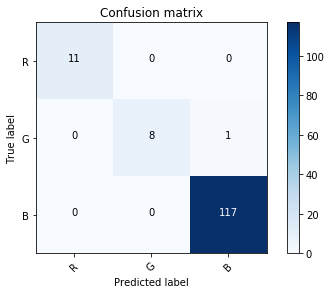


Normalized confusion matrix


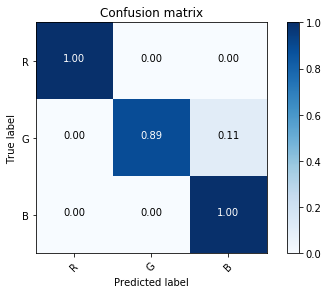


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           R       1.00      1.00      1.00        11
           G       1.00      0.89      0.94         9
           B       0.99      1.00      1.00       117

    accuracy                           0.99       137
   macro avg       1.00      0.96      0.98       137
weighted avg       0.99      0.99      0.99       137



In [59]:
Eval(neuralnetwork)


Train Accuracy :  1.0

Test Accuracy  :  0.9927007299270073

Confusion matrix, without normalization


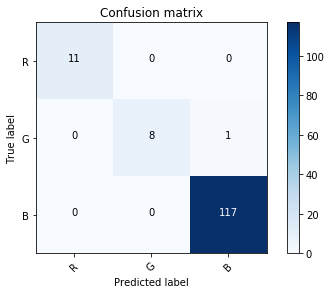


Normalized confusion matrix


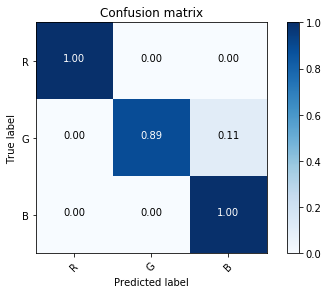


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           R       1.00      1.00      1.00        11
           G       1.00      0.89      0.94         9
           B       0.99      1.00      1.00       117

    accuracy                           0.99       137
   macro avg       1.00      0.96      0.98       137
weighted avg       0.99      0.99      0.99       137



In [60]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(1000,1000,1000), random_state=1, max_iter= 1000)

neuralnetwork= clf.fit(X_train, y_train)  
Eval(neuralnetwork)


Train Accuracy :  1.0

Test Accuracy  :  0.9854014598540146

Confusion matrix, without normalization


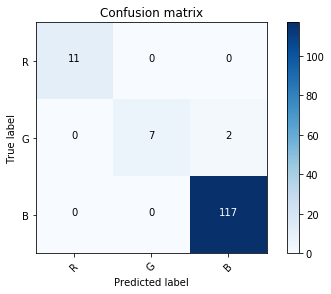


Normalized confusion matrix


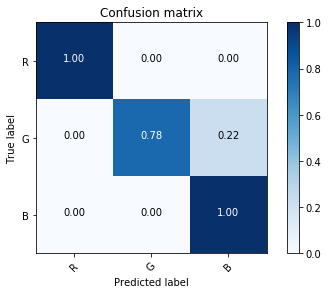


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           R       1.00      1.00      1.00        11
           G       1.00      0.78      0.88         9
           B       0.98      1.00      0.99       117

    accuracy                           0.99       137
   macro avg       0.99      0.93      0.96       137
weighted avg       0.99      0.99      0.98       137



In [61]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(1000,1000,1000,100), random_state=1, max_iter= 1000)

neuralnetwork= clf.fit(X_train, y_train)  
Eval(neuralnetwork)


Train Accuracy :  1.0

Test Accuracy  :  0.9927007299270073

Confusion matrix, without normalization


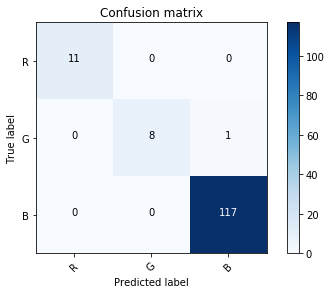


Normalized confusion matrix


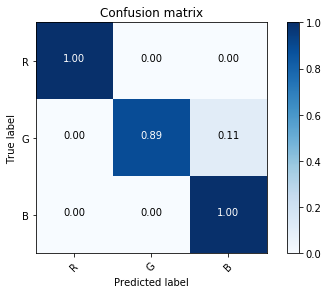


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           R       1.00      1.00      1.00        11
           G       1.00      0.89      0.94         9
           B       0.99      1.00      1.00       117

    accuracy                           0.99       137
   macro avg       1.00      0.96      0.98       137
weighted avg       0.99      0.99      0.99       137



In [62]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100,100,100,100,100,100,100,100,100,100,100), random_state=1, max_iter= 1000)

neuralnetwork= clf.fit(X_train, y_train)  
Eval(neuralnetwork)


Train Accuracy :  1.0

Test Accuracy  :  0.9927007299270073

Confusion matrix, without normalization


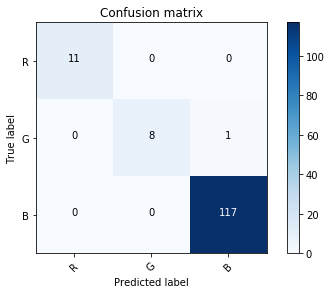


Normalized confusion matrix


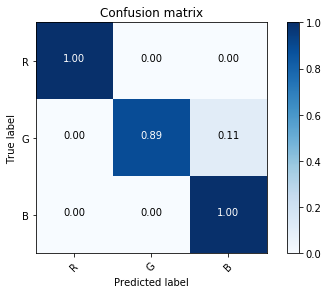


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           R       1.00      1.00      1.00        11
           G       1.00      0.89      0.94         9
           B       0.99      1.00      1.00       117

    accuracy                           0.99       137
   macro avg       1.00      0.96      0.98       137
weighted avg       0.99      0.99      0.99       137



In [63]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100,100,100,100,100,100,100,100,100,100,100), random_state=1, max_iter= 3000)

neuralnetwork= clf.fit(X_train, y_train)  
Eval(neuralnetwork)


Train Accuracy :  0.9963503649635036

Test Accuracy  :  0.9927007299270073

Confusion matrix, without normalization


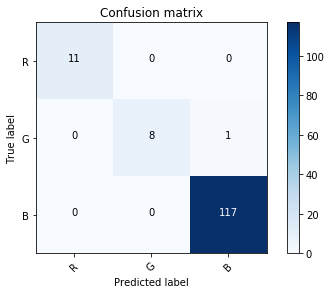


Normalized confusion matrix


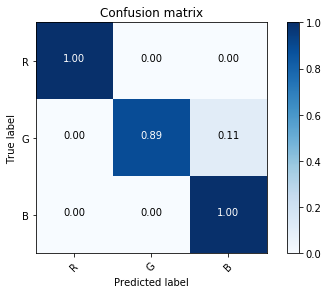


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           R       1.00      1.00      1.00        11
           G       1.00      0.89      0.94         9
           B       0.99      1.00      1.00       117

    accuracy                           0.99       137
   macro avg       1.00      0.96      0.98       137
weighted avg       0.99      0.99      0.99       137



In [64]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100,100,100,100,100,100,100,100,100,100,100), random_state=20, max_iter= 3000)

neuralnetwork= clf.fit(X_train, y_train)  
Eval(neuralnetwork)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=100000, learning_rate='constant',
              learning_rate_init=0.001, max_iter=3000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Train Accuracy :  1.0

Test Accuracy  :  0.9927007299270073

Confusion matrix, without normalization


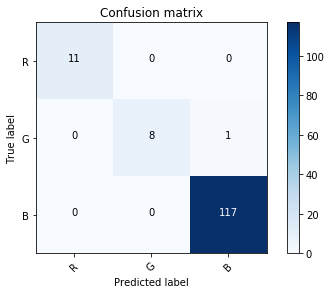


Normalized confusion matrix


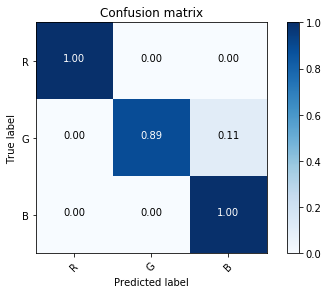


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           R       1.00      1.00      1.00        11
           G       1.00      0.89      0.94         9
           B       0.99      1.00      1.00       117

    accuracy                           0.99       137
   macro avg       1.00      0.96      0.98       137
weighted avg       0.99      0.99      0.99       137



In [68]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100000), random_state=1, max_iter= 3000)
print (clf)
neuralnetwork= clf.fit(X_train, y_train)  
Eval(neuralnetwork)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100000), random_state=1, max_iter= 3000)
print (clf)
neuralnetwork= clf.fit(X_train, y_train)  
Eval(neuralnetwork)